In [1]:
import os
import pandas as pd

results_folder_name = "results202506171031_design4"
file_name_gen_SMILES_eval = "evaluation.csv"

results_folder_path = os.path.join(results_folder_name, file_name_gen_SMILES_eval)

df_gen_SMILES_eval = pd.read_csv(results_folder_path)
print(df_gen_SMILES_eval.shape)
df_gen_SMILES_eval.head(3)

(18, 7)


,SMILES,Target_metal,Other_metal,Source,Similarity_to_Experimental,Similarity_to_Generated,LogP
0,CC12CCC(c3nnc(-c4cccc(-c5nnc6c(n5)C5(C)CCC6C5(...,ORGANIC,AQUEOUS,LLM generated,MEDIUM,NaN,ORGANIC
1,CC(C)(C)c1cc(-c2cc(C(C)(C)C)cc(-c3nnc4c(n3)C(C...,ORGANIC,AQUEOUS,LLM generated,MEDIUM,NaN,ORGANIC
2,CC12CCC(c3nnc(-c4cccc(-c5cccc(-c6nnc7c(n6)C6(C...,ORGANIC,AQUEOUS,LLM generated,MEDIUM,NaN,ORGANIC


In [2]:
ser_gen_SMILES = df_gen_SMILES_eval[
    (df_gen_SMILES_eval['Target_metal'] == 'ORGANIC') &
    (df_gen_SMILES_eval['Other_metal'] == 'AQUEOUS') &
    ((df_gen_SMILES_eval['Similarity_to_Experimental'] == 'MEDIUM') | (df_gen_SMILES_eval['Similarity_to_Experimental'] == 'LOW')) &
    (df_gen_SMILES_eval['Similarity_to_Generated'] != 'HIGH') &
    (df_gen_SMILES_eval['LogP'] == 'ORGANIC')
]['SMILES']

ser_gen_SMILES = ser_gen_SMILES.reset_index(drop=True)
print(ser_gen_SMILES.shape)
ser_gen_SMILES.head(3)

(9,)


0    CC12CCC(c3nnc(-c4cccc(-c5nnc6c(n5)C5(C)CCC6C5(...
1    CC(C)(C)c1cc(-c2cc(C(C)(C)C)cc(-c3nnc4c(n3)C(C...
2    CC12CCC(c3nnc(-c4cccc(-c5cccc(-c6nnc7c(n6)C6(C...
Name: SMILES, dtype: object

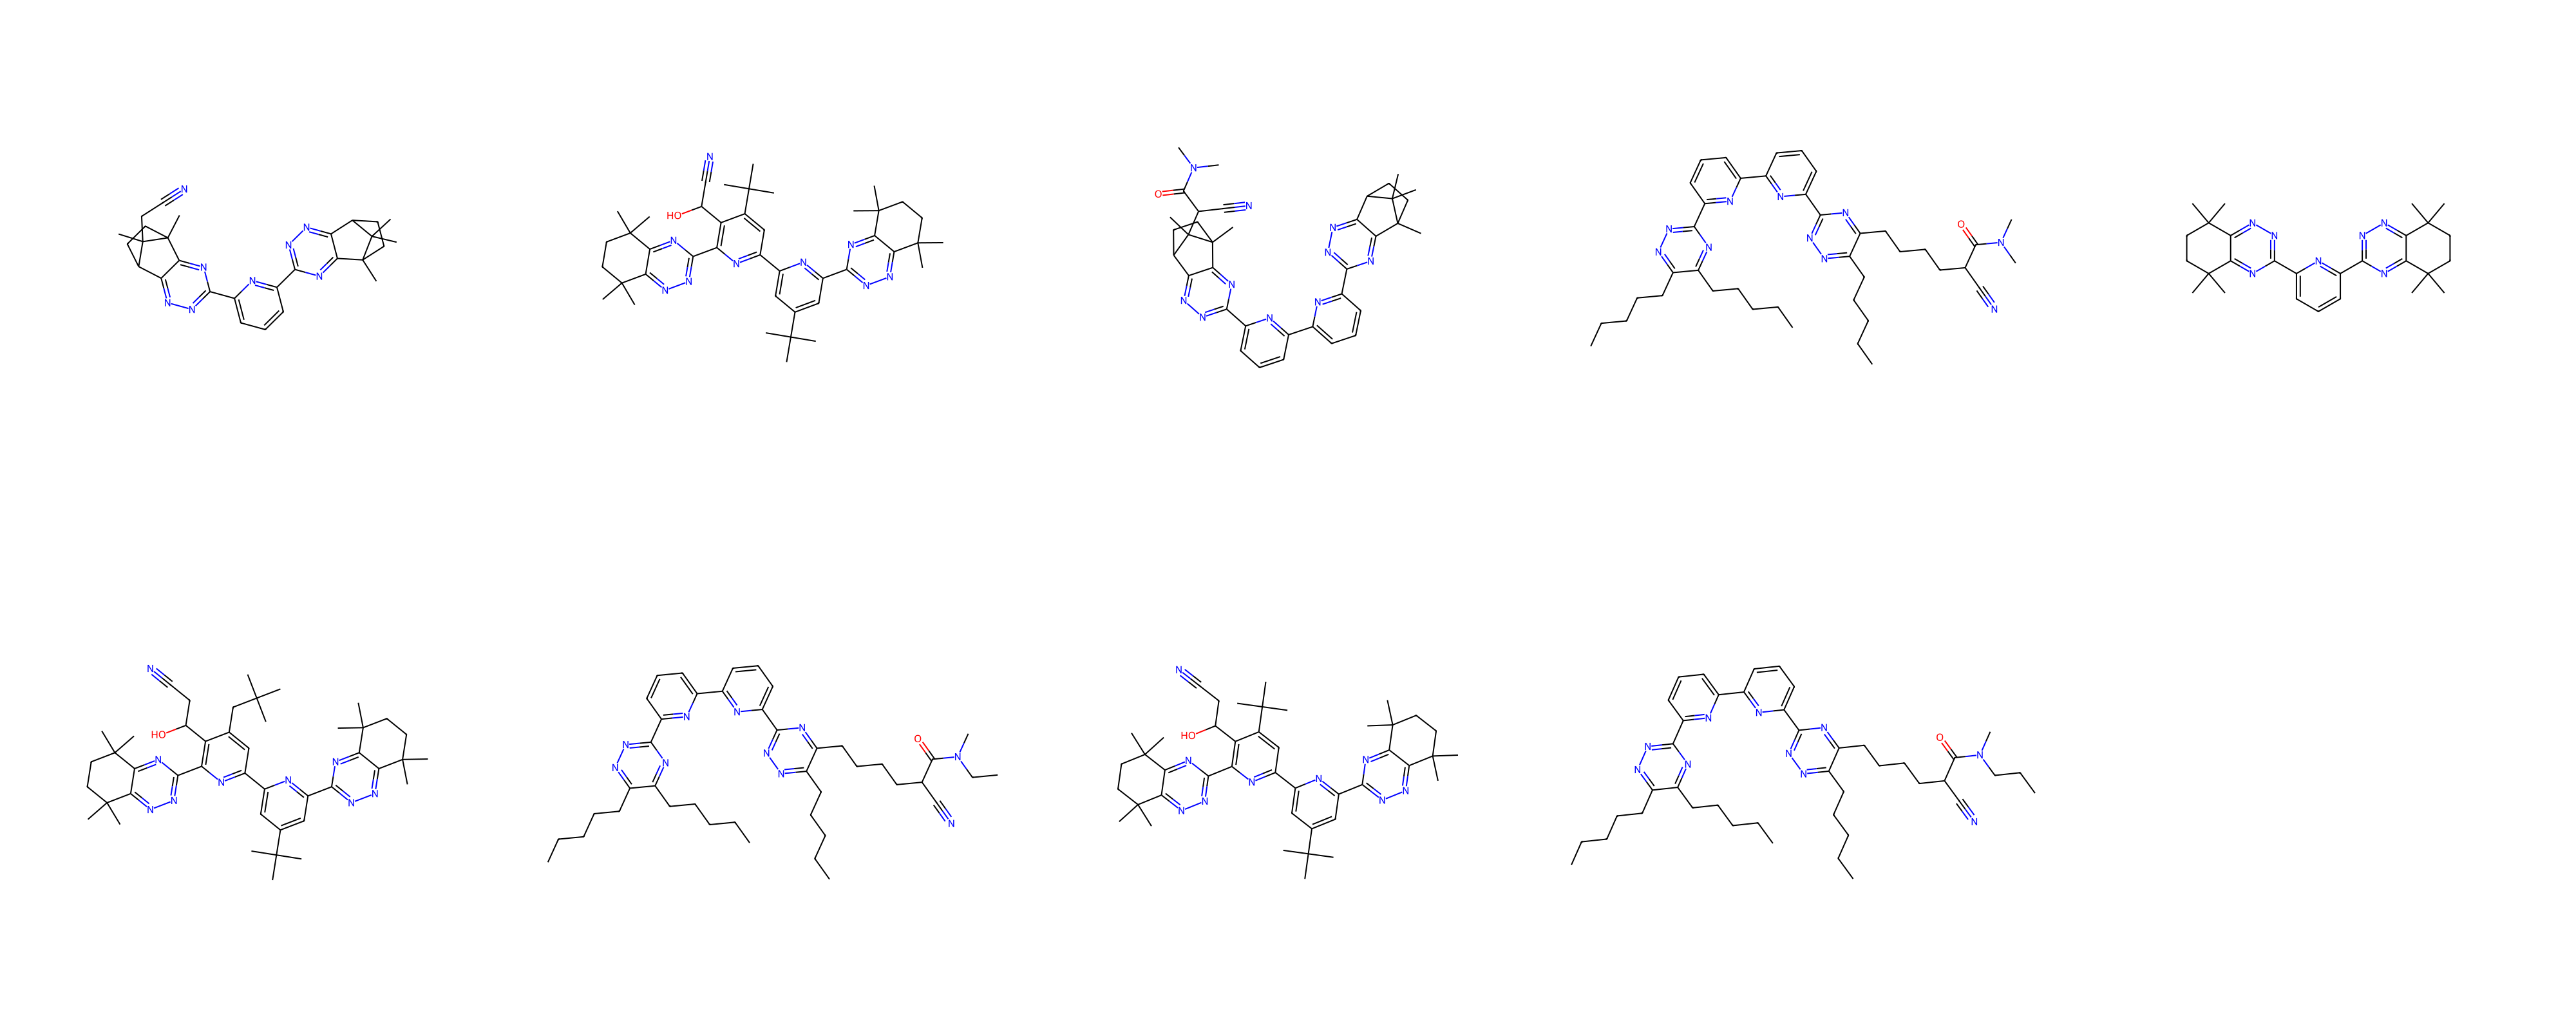

In [3]:
from rdkit import Chem
from rdkit.Chem import Draw

list_mol_obj = [Chem.MolFromSmiles(smile) for smile in ser_gen_SMILES]
img = Draw.MolsToGridImage(
    list_mol_obj,
    molsPerRow=5,
    subImgSize=(800, 800),
    useSVG=False,
    returnPNG=False,
    maxMols=100
)

img